<a href="https://colab.research.google.com/github/vivianusdjpy/Nairobi-Hospital-test-for-hypothyroidism./blob/master/Nairobi_Hospital_test_for_hypothyroidism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nairobi Hospital Project to test for Hypothyroidism:
Using Decision Trees and Support Vector Machines to Build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism or not.

### a) Defining the Question

As a Data Scientist, I have been recruited to work for Nairobi Hospital which is a private hospital in Kenya. I have been tasked to create a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism or not.

### b) Defining the Metric for Success
This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism. 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context: Factors that increase the risk for hypothyroidism

Being a woman

Are older than 60

Have a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

Have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months

### d)Experimental Design
The project was undertaken using the following design
Datasets(hypothyroid.csv)

Exploratory Data Analysis

Data Cleaning

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Modelling

    Decision Trees: 
        Random Forests , Ada Boosted Trees , Gradient Boosted Trees

    Support Vector Machines: 
        Kernel = polynomial , linear , rbf

Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

How accurate is the data at predicting whether a patient has hypothyroidism or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Importing the libraries

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [2]:
#loading the dataset and previewing the first five elements
hypothyroid = pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#obtaining information about the dataset
hypothyroid.info()
#the data has 20 columns and 3162 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [4]:
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


###### There are no null values in the data but there is a special character   ' ? '. We cannot perform any analysis on the data thus we replace the special character with zeros.

##Data Cleaning

###Missing Values

In [5]:
hypothyroid_1 = hypothyroid.replace(['?'], np.nan)
hypothyroid_1.isnull().sum().sum()

5329

In [6]:
#viewing the null values per column
hypothyroid_1.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [7]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hypothyroid_1.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(hypothyroid_1[column].unique())        # Printing out the unique values in each column
  print(hypothyroid_1[column].nunique())       # Printing out the number of unique values in each column
  print('\n............................')      # Creating a new line filled with . to separate the columns

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


From the above code, we can see that,


Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [8]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them
# Creating two lists, 
# A list of categorical columns
# A list of numerical columns

#creating a copy
hypothyroid_2 = hypothyroid_1

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_2.columns:
  if column in numerical_columns:
    hypothyroid_2[column]= pd.to_numeric(hypothyroid_2[column])
  
  else:
    hypothyroid_2[column] = hypothyroid_2[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_2.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

#### TBG column

In [9]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
hypothyroid_3 = hypothyroid_2.drop(['TBG'], axis =1)
hypothyroid_3.head(5)
hypothyroid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
status                       3163 non-null category
age                          2717 non-null float64
sex                          3090 non-null category
on_thyroxine                 3163 non-null category
query_on_thyroxine           3163 non-null category
on_antithyroid_medication    3163 non-null category
thyroid_surgery              3163 non-null category
query_hypothyroid            3163 non-null category
query_hyperthyroid           3163 non-null category
pregnant                     3163 non-null category
sick                         3163 non-null category
tumor                        3163 non-null category
lithium                      3163 non-null category
goitre                       3163 non-null category
TSH_measured                 3163 non-null category
TSH                          2695 non-null float64
T3_measured                  3163 non-null category
T3         

In [0]:
#replace the null values in the age column with the mean age
#creating a copy
hypothyroid_4 = hypothyroid_3
hypothyroid_4['age']= hypothyroid_3['age'].fillna(hypothyroid_3['age'].mean(), axis = 0)

In [0]:
#replace the null values in the sex column with the modal value
#creating a copy
hypothyroid_5 = hypothyroid_4
hypothyroid_5['sex']= hypothyroid_4['sex'].fillna(hypothyroid_4['sex'].mode(), axis = 0)

Replacing the rest of the null values with zeros

In [0]:
#The null values are in all the numerical column
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#creating a copy
hypothyroid_6 = hypothyroid_5

#dropping the null values and assigning the resultant values to a new dataframe
hypothyroid_6[numerical_columns_2] = hypothyroid_5[numerical_columns_2].fillna(0)

###Duplicates

In [13]:
hypothyroid_6.duplicated().sum()

152

There are 152 duplicates thus we drop them!

In [14]:
hypothyroid_7 = hypothyroid_6.drop_duplicates()
hypothyroid_7.shape

(3011, 25)

##Univariate Analysis

###Status column
This is the dependent variable which we are trying to predict.

The status column is binary where [ ' Hypothyroid ' ] indicates that the patient is sick

while [ ' negative ' ] indicates that the patient is healthy.

In [15]:
#['hypothyroid', 'negative']
hypothyroid_7.status.describe()

count         3011
unique           2
top       negative
freq          2870
Name: status, dtype: object

###Age
This column indicates the age of the patients

In [16]:
hypothyroid_6.age.isnull().sum()

0

In [17]:
hypothyroid_6.age.nunique() 
#[93] There are 93 unique ages

93

In [18]:
hypothyroid_6.age.unique()
#The unique values are

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

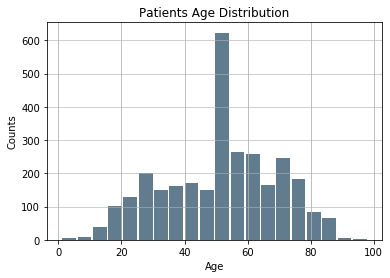

In [19]:
#visualizing age dirstibution
size, scale = 1000, 10
age = hypothyroid_7['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The distribution is fairly normal, and leptokurtic: the kurtosis is greater than normal.

The distribution is more concentrated around the mean

Text(0.5, 1.0, 'Boxplot of Age')

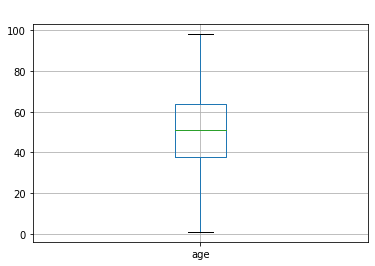

In [20]:
#checking for outliers using a boxplot
hypothyroid_7.boxplot(column=['age'])
plt.title("Boxplot of Age",fontsize=16,color="white")

There are no outliers in the data.

###Sex
This column gives the gender of the patients in the dataset

In [21]:
hypothyroid_7.sex.nunique()
#there are 30 unique values
hypothyroid_7.sex.describe()

count     2938
unique       2
top          F
freq      2049
Name: sex, dtype: object

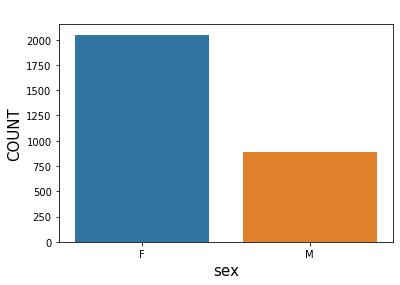

In [22]:
#visualizing the distribution of gender in the dataset
sb.countplot('sex',data = hypothyroid_7)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#

The female patients entries are more than double that of male patients: The data is un-balanced.

##Other Numerical Columns: TSH  ,  T3  , TT4  ,  T4U  ,  FTI 

#####Histograms

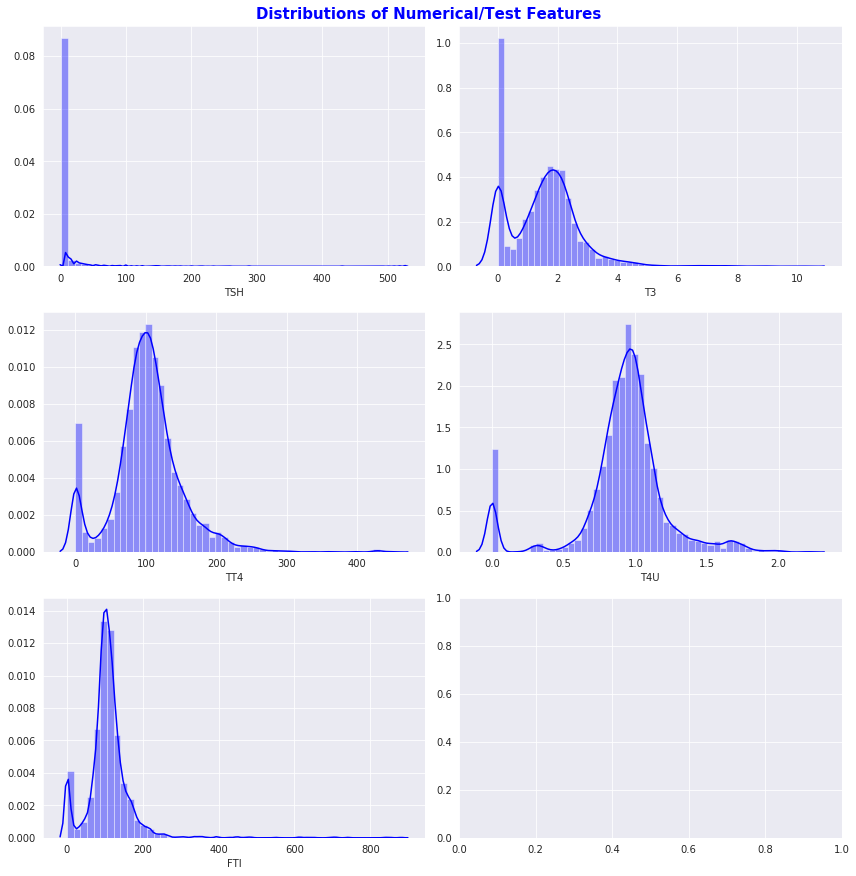

In [23]:
# Histograms of the numerical columns
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sb.distplot(hypothyroid_7[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

TSH, T3,TT4, and FT Columns are right skewed.

#####Box Plots

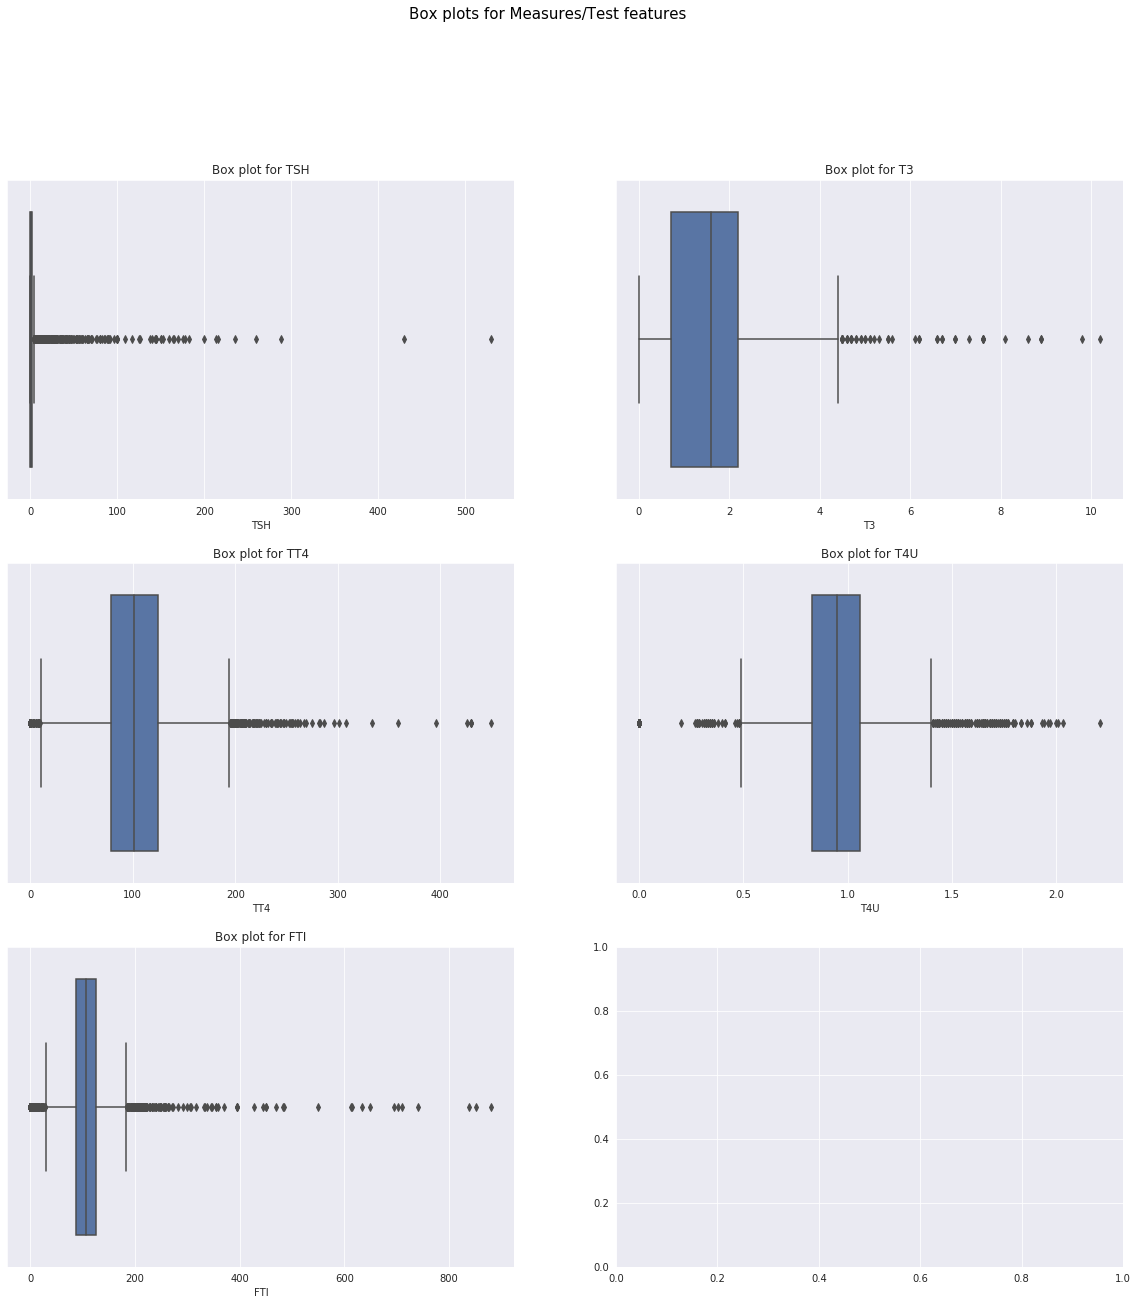

In [24]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'black', fontsize = 15)

sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sb.boxplot(hypothyroid_7[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()


##Other Categorical Columns:

#####Countplots

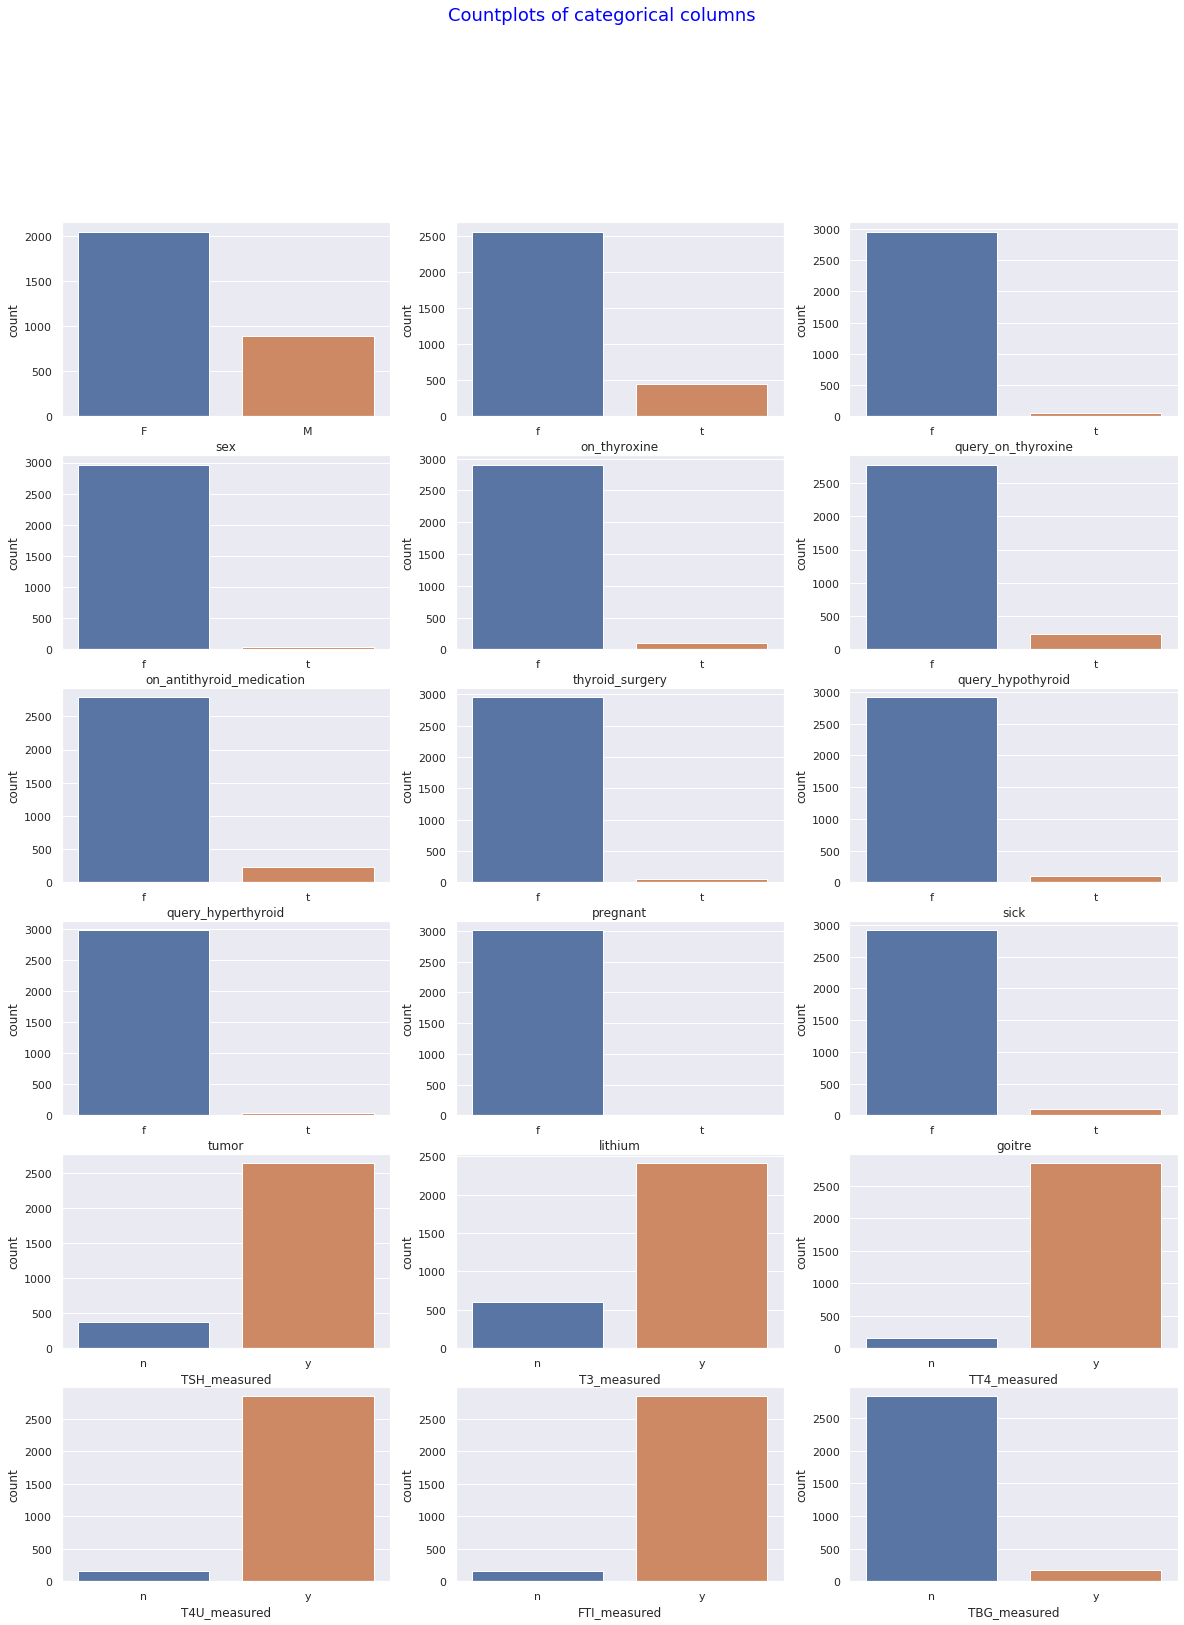

In [25]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = hypothyroid_7.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypothyroid_7, categorical_columns_1):
   sb.countplot(hypothyroid_7[column], ax=ax)

# Bivariate Analysis

## Checking for Multi-collinearity

In [26]:
# Let's display the correlations between the variables
corr = hypothyroid_7.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


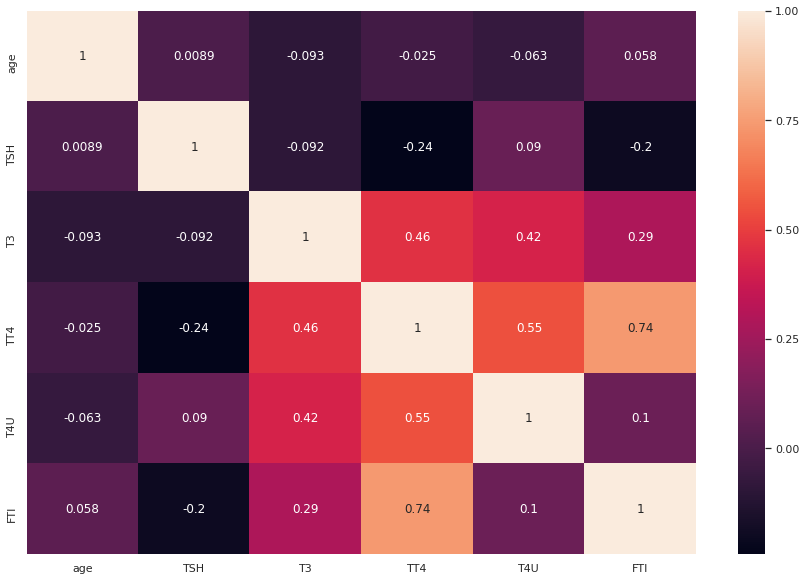

In [27]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

#Multi-Variate Analysis

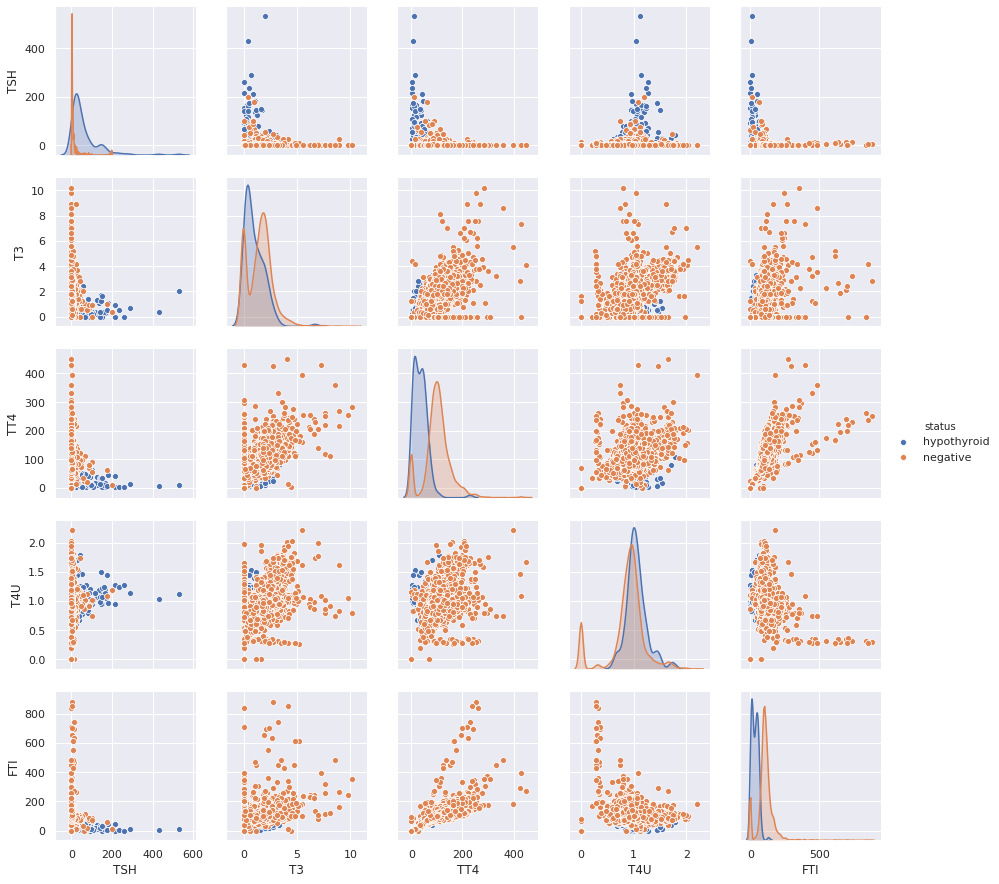

In [28]:
# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','T3','TT4','T4U','FTI']

sb.pairplot(hypothyroid_4, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()


In [29]:
hypothyroid_7.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

##### Encoding

#####PCA

In [39]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = hypothyroid_7.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query_hyperthyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


# Modelling


##1st Approach: Decision Trees

####Random forests

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

y = hypothyroid_7.status.cat.codes
# Split the independent and dependent variables


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2141,1,0.999995
566,1,0.999995
2714,1,0.999995
2600,1,0.999995
1941,1,0.999995


In [58]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred.round()))

R2 score : 0.85
accuracy_score: 0.995575221238938


In [34]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.012867639639354635
Mean Squared Error: 0.005735035923064588
Root Mean Squared Error: 0.0757300199594889


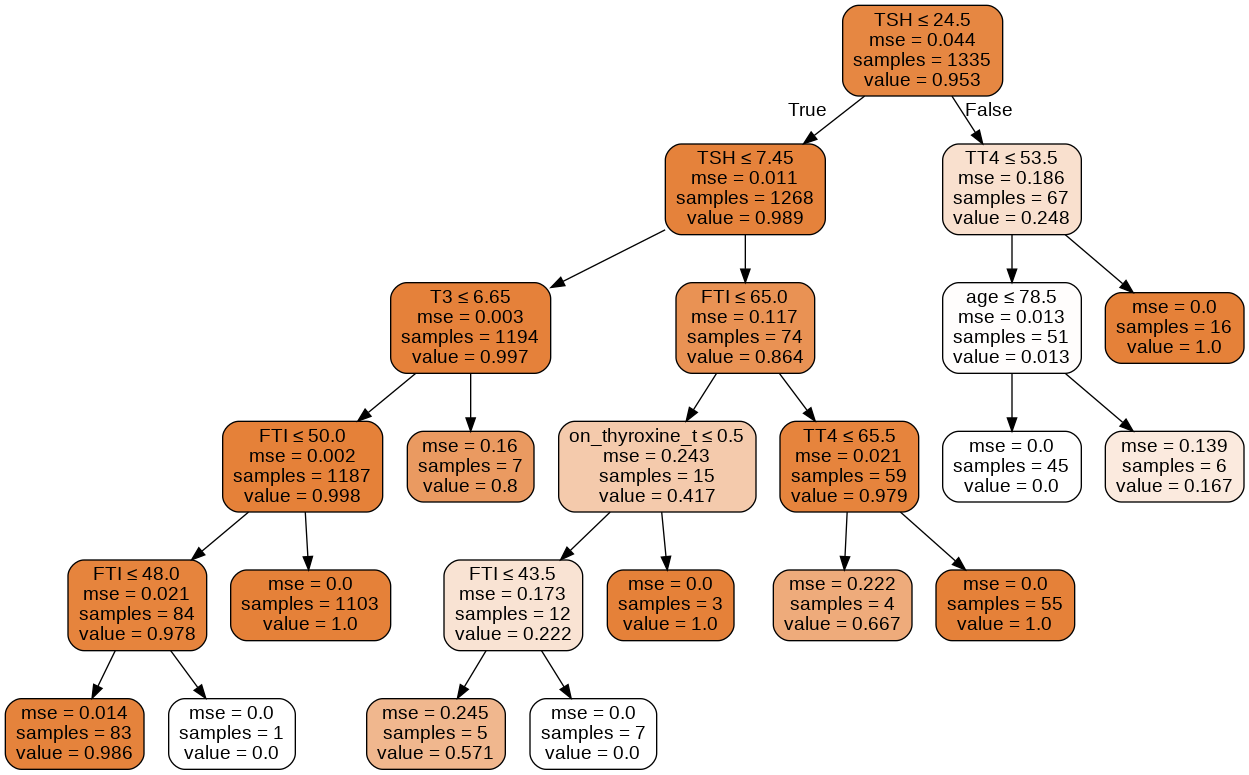

In [35]:
#Visualizing tree number 50
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

####Ada boosted trees

In [62]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada.round())

0.9911504424778761

####gradient boosted trees

In [63]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

## 2nd Approach: Support Vector Machines

##### kernel = polynomial

In [64]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.9612831858407079

##### kernel = linear

In [71]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9878318584070797

##### kernel = rbf

In [67]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9601769911504425

In [68]:
# For further evaluation you can also check the confusion matrix
confusion_matrix2 = confusion_matrix(y_test, poly_pred2)
confusion_matrix2


array([[  0,  35],
       [  1, 868]])

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

#Conclusion

All the models achieved an accuracy score greater than 90% percent.
This may mean that,

-> The data was sufficient for training.

-> The data was unbalanced and this caused everfitting.
